<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.3: Measurements

In [16]:
## Import Libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 1.1 Load Diabetics Data Using datasets of sklearn

In [2]:
## Load the Diabetes Housing dataset

# Load the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

In [3]:
df = pd.DataFrame(diabetes.data)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
# Description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [6]:
# Target
y = diabetes.target

In [7]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 1.2 Use Forward Feature Selection to pick a good model

**Hint: Same as Lab 4.2.2**

- Add R^2 value in a list
- Add Adjusted R^2 in another list
- Display both R^2 and Adjusted R^2

In [9]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [10]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]
p = X_train.shape[1]

r2_list = []
adjusted_r2_list = []

In [11]:
while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X=X_train[included + [new_column]], y=y_train) # fit a model; consider which predictors should be included
        
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X=X_train[included + [new_column]], y=y_train) # calculate the score
        r2_list.append(r2)
        
        # number of predictors in this model
        k = len(included) + 1
        
        # calculate the adjusted R^2
        adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1) # calculate the Adjusted R^2
        adjusted_r2_list.append(adjusted_r2)

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = bp, s6, age, sex, s3, bmi, s2, s5, s1, s4
(Step) Trying bp...
(Step) - Features = bp
(Step) - Adjusted R^2: This = 0.174; Best = 0.000
(Step) - New Best!   : Feature = bp; R^2 = 0.198; Adjusted R^2 = 0.174
(Step) Trying s6...
(Step) - Features = s6
(Step) - Adjusted R^2: This = 0.128; Best = 0.174
(Step) Trying age...
(Step) - Features = age
(Step) - Adjusted R^2: This = 0.011; Best = 0.174
(Step) Trying sex...
(Step) - Features = sex
(Step) - Adjusted R^2: This = -0.029; Best = 0.174
(Step) Trying s3...
(Step) - Features = s3
(Step) - Adjusted R^2: This = 0.123; Best = 0.174
(Step) Trying bmi...
(Step) - Features = bmi
(Step) - Adjusted R^2: This = 0.347; Best = 0.174
(Step) - New Best!   : Feature = bmi; R^2 = 0.366; Adjusted R^2 = 0.347
(Step) Trying s2...
(Step) - Features = s2
(Step) - Adjusted R^2: This = -0.005; Best = 0.347
(Step) Trying s5...
(Step) - Features = s5
(Step) - Adjusted R^2: This = 0.285; Best = 0.347
(Step) Trying s1...
(Step) - Features = s1
(

In [30]:
print(diabetes.target)
print(diabetes.target.min())
print(diabetes.target.max())

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [33]:
# Redo train, test split with included features to run predictions. 

X = pd.DataFrame(diabetes.data, columns = ['bmi', 's5', 'bp', 's1', 's2', 'sex', 's4', 's6', 's3', 'age'])
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)


y_preds = model.predict(X_test)

rmse = mean_squared_error(y_test, y_preds, squared=False)

normalized_rmse = rmse/(diabetes.target.max() - diabetes.target.min())

def evaluate_model():
    print("R2 is ", model.score(X_test, y_test))
    print("RMSE is ", rmse)
    print("Normalized RMSE is ", normalized_rmse)

    if model.score(X_test, y_test) > 0.8:
        print("The model explains the variance significantly.")
    else:
        print("The model does not explain the variance well enough.")

    if normalized_rmse < 0.2:
        print("The model produces predictions within an acceptable error range.")
    else:
        print("The model produces predictions with too great an error range.")

evaluate_model()

R2 is  0.4526027629719196
RMSE is  53.85344583676592
Normalized RMSE is  0.1677677440397692
The model does not explain the variance well enough.
The model produces predictions within an acceptable error range.


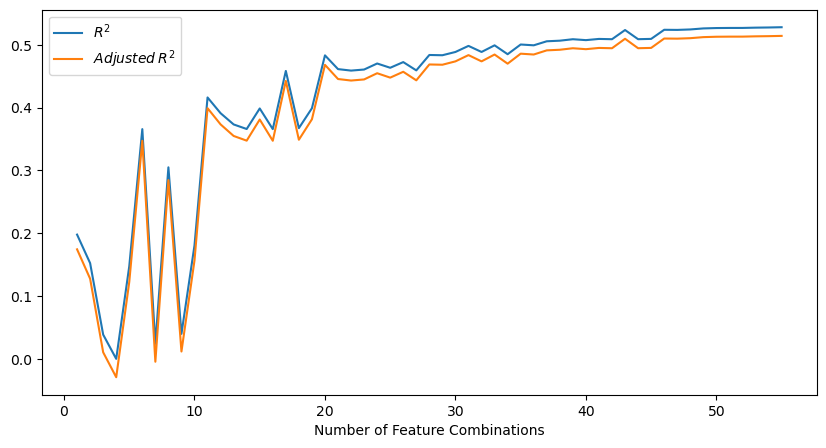

In [34]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Feature Combinations')
plt.legend()
# output the chart
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



